### Preganancy data prediction & interpretability: Term or pre-term.

The question relates to cool data set of 2000 women's pregnancies with bio and demo data about the patients.   
Target is whether the woman had a term or pre-term birth.  
The AUC was .83 on training, but much lower on production.  
So we are hoping you can provide a perspective on why and if we can do anything in the future to improve it. 

<img src="Image/structure_Classification.png">

### Preq

In [66]:
# imports
import h2o 
import numpy as np
import pandas as pd
from collections import Counter 
import seaborn as sns
from heapq import nlargest 

# display matplotlib graphics in notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# start h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,18 hours 13 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,4 months and 27 days !!!
H2O cluster name:,H2O_from_python_Zi_Wei_Fan_836jss
H2O cluster total nodes:,1
H2O cluster free memory:,1.680 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### Read the Training & Production data.

In [68]:
path_training = 'data/Compiled_list_for_AI_training.csv'
frame_training = h2o.import_file(path=path_training)

path_production = 'data/nir_validation.csv'
frame_production = h2o.import_file(path=path_production)

pd.options.display.max_columns = None

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [69]:
training_seq_no = frame_training['Seq no']
production_seq_no = frame_production['Seq no']

- Drop 'Seq No.', 'Training =1, Validation = 2' and for binary classification, 
- Categorize lables to be a factor.

In [70]:
target='Gestational Category at Delivery'

In [71]:
frame_training = frame_training.drop('Training =1, Validation = 2').drop('Seq no')
frame_production = frame_production.drop('Training =1, Validation = 2').drop('Seq no')

frame_training.head(3)

Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
Term,20.86,36.66,3,1,29.6,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,No,No,No,No,No,106.457,299.31,1.05487,3.62024,50.9865,12.1944,58.5296,31863.6,112.299,385.4,5427.87,1298.18,6230.89,315.733,1083.57,15260.8,3649.9,17518.5,3.81889,53.7842,12.8635,61.7412,184.583,44.1466,211.891,621.749,2984.22,713.732,21.0658,28.8227,0.0407417,11.5601,0.526458,0.397284,0.659151,0.781434,0.71527,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.08519,1.01903,1.01138,1.14131,1.13366,1.0675,0.746046,1.00791,1.1302,1.06403,1.05638,0.87874,1.00102,0.934858,0.927207,1.26289,1.19673,1.18907,1.31901,1.31136,1.24519,1.04981,1.17209,1.10593,1.09827,1.43396,1.36779,1.36014,1.49008,1.48242,1.41626,1.30478,1.23862,1.23097,1.3609,1.35325,1.28709,1.62277,1.61512,1.54895,1.67124,0.0619736,0.0390199,0.0855525,0.107282,0.0955245,0.0941649,0.0765842,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
Term,23.57,26.26,3,2,31,Yes,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,Done,Yes,No,No,No,No,GBS not reported,No,No,No,No,No,No,1322.59,2453.53,120.71,1.39547,1778.65,69.1083,74.4008,3.245e+06,159650,1845.62,2.35242e+06,91401.7,98401.5,296166,3423.81,4.36397e+06,169559,182544,168.447,214701,8342.07,8980.93,2482.05,96.4383,103.824,122920,132333,5141.71,179.324,205.415,0.0281669,0.572515,5.06654,27.3354,2.39321,23.2689,5.25418,2.88125,27.9866,3.04449,23.9202,5.90546,3.53252,25.3133,46.189,28.1743,25.8014,21.2469,3.23214,0.859202,24.1078,21.7349,3.72017,30.1943,5.25212,26.1278,8.11309,5.74015,27.5209,48.3966,30.3819,28.009,23.4545,5.43977,3.06683,26.3155,23.9425,5.9278,28.1722,49.0479,31.0332,28.6603,24.1058,6.09104,3.71811,26.9667,24.5938,6.57908,46.3746,28.3599,25.9869,49.2356,46.8626,28.8479,24.2934,21.9205,3.90576,24.7814,6.3114,55.4727,0.409699,46.4955,6.72566,1.4871,71.8378,0.530564,60.2122,8.70981,1.92581,4.66328,529.222,76.553,16.9265,3.90861,0.565388,0.125012,64.1643,14.1873,2.05222
Term,20.29,38.99,2,0,24.6,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,Yes,No,Yes,No,No,145.187,100.242,0.03125,1.64485,21.5582,0.15625,74.4387,14553.9,4.53709,238.811,3129.96,22.6855,10807.5,3.13257,164.883,2161.04,15.6629,7461.91,0.0514015,0.673692,0.00488281,2.32621,35.4599,0.257008,122.44,3.36846,1604.76,11.6311,12.2552,5.72527,0.00155872,5,0.359147,0.248848,0.461091,0.497616,0.249231,0.916306,0.12331,0.335553,0.372078,0.123693,0.790768,0.225253,0.261779,0.0133933,0.680468,0.474022,0.225636,0.8927

In [77]:
frame_training[target].asfactor()
frame_training[target].types

{'Gestational Category at Delivery': 'enum'}

### <font color='red'>Session 1: Comparison training & production. </font>

#### 1.0: convert to pd frame for some pre-processing.

In [8]:
pd_frame_training = frame_training.as_data_frame()
pd_frame_production = frame_production.as_data_frame()

- 2 categories in target:

In [10]:
pd_frame_training['Gestational Category at Delivery'].unique()

array(['Term', 'Preterm (?20 weeks < 37 weeks)'], dtype=object)

#### 1.1: Compare columns numbers of T & P data:  
- <font color='red'>1 column difference</font> between Training & production.
- <font color='red'>Gestational Category at Delivery</font> is missed in production, to be predicted.

In [196]:
#print('Training column number: ', len(pd_frame_training.columns))
#print('Production column number: ',len(pd_frame_production.columns))
#print('Column difference: ', set(pd_frame_training.columns)-set(pd_frame_production.columns))

#### 1.2: Exploration based on raw data:

- __Training:__  Without pre-processing the data: null data, encoder etc.

In [12]:
desc_training=pd_frame_training.describe()
desc_training

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,136.000000,136.000000,136.000000,136.000000,135.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,19.646912,33.465147,2.360294,0.698529,25.024222,554.494669,979.075364,5.214945,5.901148,97.346723,25.940555,93.895057,7.236559e+05,4609.891160,3830.542488,6.947935e+04,18586.897351,72609.782904,9530.978112,11673.388449,1.386575e+05,41532.986099,118785.686501,54.568113,2041.957433,240.561174,613.507263,528.762419,232.630565,675.519146,3838.465461,9114.123872,2953.319360,72.148444,80.333631,0.032945,40.119651,2.066391,2.011123,1.710343,2.078247,2.069107,1.775669,2.226415,1.925634,2.293538,2.284398,1.990960,1.870367,2.238271,2.229131,1.935693,1.937490,1.928350,1.634912,2.296254,2.002816,1.993676,3.151964,2.851184,3.219088,3.209947,2.916510,2.795917,3.163821,3.154680,2.861242,2.863040,2.853900,2.560462,3.221804,2.928366,2.919226,3.011208,3.379112,3.369972,3.076534,3.078331,3.069191,2.775753,3.437095,3.143657,3.134517,3.023064,3.013924,2.720486,3.381828,3.088390,3.079250,3.081047,2.787609,2.778469,3.146373,1.407484,1.601779,0.850318,1.373258,1.367690,1.097323,2.311831,1.808942,1.913138,2.133441,1.253170,1.510662,5.033270,2.207566,1.156289,0.832671,1.363842,0.813380,2.003688,0.977115,1.178762
std,2.198234,4.074251,1.359045,0.743564,6.415595,518.024662,931.568661,10.794359,23.975894,153.863305,22.949406,62.788515,1.165532e+06,14269.084400,15859.129459,2.098357e+05,27597.303876,96951.103234,26967.146120,73338.854767,3.911068e+05,58948.563430,159041.084509,351.104849,18379.487244,740.785080,1026.129651,2183.857122,1376.237577,3179.685802,10890.861390,13341.161537,3534.966560,55.640833,70.789940,0.034559,135.958560,1.623055,2.645685,3.341297,2.164335,1.547358,1.302469,2.896549,3.631241,2.388036,1.967672,1.439544,4.067325,3.998546,2.831825,2.417139,3.652570,3.482825,3.283995,2.392509,1.907063,1.327767,3.323992,3.858974,2.788555,2.439444,2.038114,4.329369,4.307694,3.254676,2.901502,3.867295,3.708180,3.522445,2.777082,2.372223,1.938903,4.660988,4.531481,3.609718,3.123188,4.191105,4.101103,3.791373,3.126876,2.567304,2.276402,5.228521,4.522494,4.198952,4.509955,4.095873,3.037922,4.084808,3.735420,3.628237,2.541233,2.266917,4.958018,3.520468,4.147397,2.030708,1.465184,6.541142,11.364798,5.396326,3.028034,1.677858,9.719974,45.304040,6.797987,1.933966,3.439037,8.068459,3.828599,5.685

 - __Production:__ Without pre-processing the data: null data, encoder etc.

In [13]:
desc_production=pd_frame_production.describe()
desc_production

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,150.000000,150.000000,150.000000,150.000000,148.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,19.310467,33.113733,2.473333,0.793333,25.015878,639.537762,748.615912,4.431144,8.986554,72.759349,19.731574,125.458490,5.904949e+05,3932.318802,5895.273993,52234.270998,16801.137493,132512.113804,5596.069279,17094.748010,7.645985e+04,26155.672830,1.240323e+05,84.211212,410.819898,148.123518,796.675203,958.505381,385.135907,1468.378228,2076.409953,10004.864693,3368.514862,73.026387,61.321347,0.029579,11.643876,1.939806,1.989915,2.262623,1.929056,1.937343,2.203394,1.794717,2.067425,1.733859,1.742146,2.008196,2.117534,1.783968,1.792255,2.058305,2.056675,2.064963,2.331013,1.731396,1.997447,2.005734,2.862219,3.134927,2.801360,2.809648,3.075698,3.185036,2.851469,2.859756,3.125807,3.124177,3.132464,3.398515,2.798898,3.064948,3.073235,2.989838,2.656272,2.664559,2.930609,2.928980,2.937267,3.203317,2.603700,2.869751,2.878038,2.979089,2.987376,3.253426,2.653809,2.919860,2.928147,2.926517,3.192567,3.200855,2.867288,1.148491,1.366346,1.308655,1.032409,1.236288,2.002603,1.357381,2.649051,1.054961,1.343549,1.308522,2.331300,1.012640,1.359290,1.501509,1.509410,2.257934,1.768046,1.083891,1.072611,1.344479
std,1.688122,4.265422,1.629002,1.076264,5.389998,632.012514,770.417854,4.071459,27.958160,47.311200,19.198739,106.243988,1.000191e+06,5990.478843,14840.451771,74516.155686,27919.809857,202432.568972,8618.912169,69011.803322,1.228820e+05,41433.271715,2.269844e+05,312.231888,529.612466,202.591701,1165.975761,3595.085053,1519.330648,5227.538906,2809.012892,14607.673580,5385.326478,62.001336,58.940041,0.031540,42.678288,1.535026,1.612353,3.873464,1.285945,1.564865,1.904961,1.623925,4.226723,1.315540,1.643048,1.539741,4.125202,1.212829,1.598744,1.599127,3.886443,4.122386,3.946708,1.305219,1.195141,1.535989,2.226212,4.413817,1.872960,2.206722,2.347745,4.354861,1.891884,2.248763,2.455452,4.063301,4.335057,4.283252,1.913896,2.087786,2.383785,4.708582,2.000171,2.377437,2.261778,4.444760,4.712961,4.500740,2.073116,1.866757,2.232079,4.328494,4.616063,4.436521,1.995509,1.870577,2.261088,4.352848,4.128620,4.411752,1.880363,1.945334,2.081486,3.294338,1.472810,2.054439,3.059284,2.090600,10.694266,1.695474,2.128319,2.394650,8.643816,1.305455,1.859130,2.197537,5.661373,8.907370,6.294380,1.466311,1.

- Filter and get the variables of T & P with difference:

In [14]:
diff_rate = abs(desc_training-desc_production)/abs(desc_production)
#difference_locations = np.where(diff_rate>0.3)
ne_stacked = (diff_rate>0).stack()
changed = ne_stacked[ne_stacked]
changed.index.names = ['id', 'col']

In [15]:
diff_rate

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,0.093333,0.093333,0.093333,0.093333,0.087838,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333
mean,0.017423,0.010612,0.045703,0.119501,0.000334,0.132976,0.307847,0.176885,0.343336,0.337927,0.314672,0.251585,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258,0.012022,0.310043,0.113806,2.445558,0.065256,0.010658,0.244088,0.077339,0.068012,0.194121,0.240538,0.068583,0.322794,0.311255,0.008583,0.116724,0.254659,0.243758,0.059570,0.057950,0.066157,0.298626,0.326244,0.002688,0.006012,0.101231,0.090510,0.149116,0.142473,0.051757,0.122171,0.109541,0.103129,0.084639,0.083586,0.088928,0.246594,0.151097,0.044563,0.050113,0.007147,0.272126,0.264739,0.049793,0.050991,0.044914,0.133475,0.320081,0.095446,0.089116,0.014761,0.008887,0.163809,0.274330,0.057719,0.051604,0.052803,0.126844,0.131960,0.097334,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258
std,0.302178,0.044819,0.165719,0.309125,0.190278,0.180357,0.209173,1.651226,0.142437,2.252154,0.195360,0.409016,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593,0.102587,0.201050,0.095731,2.185661,0.057347,0.640884,0.137388,0.683070,0.011188,0.316275,0.783671,0.140885,0.815252,0.197575,0.065074,0.014030,2.296875,0.771280,0.511537,0.060177,0.155143,0.167915,0.833032,0.595680,0.135562,0.493116,0.125706,0.488849,0.105461,0.131884,0.005854,1.276934,0.447318,0.181657,0.048238,0.144606,0.177624,0.451010,0.136238,0.186628,0.010108,1.265547,0.518323,0.380855,0.057068,0.129825,0.157611,0.508298,0.375275,0.019857,0.207931,0.020270,0.053549,1.260053,1.189631,0.343566,0.061578,0.095238,0.177597,0.351459,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593
min,0.000000,0.075750,0.000000,NaN,0.012346,0.758650,0.791367,0.788375,3.758746,0.200993,0.000000,6.575758,0.398837,0.885472,0.315857,0.736273,0.606665,0.311850,0.693813,4.313906,1.560059,1.203508,2.191914,0.343918,0.525444,0.769088,0.709226,7.904096,7.738909,4.358142,1.631662,12.365850,3.551269,0.052881,0.799734,0.560187,6.132341,0.127029,0.713192,0.399143,0.179356,0.791897,0.

#### The following features are quite different between training and production datasets. 
- The difference rate is '0.3' to filter the variables name in prod and training data.
e.g.:  
<font color='red'>'Gestational Age at Collection' in Std</font>  
<font color='red'>'Parity ' in std, mean, etc</font>
<font color='red'> as below: </font>

In [16]:
for col in diff_rate.columns:
    ind = diff_rate[diff_rate[col]>0.3].index.values
    print(col,':', ind)

Gestational Age at Collection : ['std']
Maternal Age at Recruitment / 1st Sample : []
Gravidity : []
Parity : ['std' 'max']
Maternal BMI : []
B1 : ['min']
B2 : ['mean' 'min' '50%' '75%']
B3 : ['std' 'min' '25%' 'max']
B4 : ['mean' 'min' '25%' '50%']
B5 : ['mean' 'std' 'max']
B6 : ['mean' '25%' '50%']
B7 : ['std' 'min' 'max']
P1 : ['min']
P2 : ['std' 'min' '25%' 'max']
P3 : ['mean' 'min' '50%' 'max']
P4 : ['mean' 'std' 'min' 'max']
P5 : ['min' '25%' '50%' '75%']
P6 : ['mean' 'std' 'min' '75%' 'max']
P7 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P8 : ['mean' 'min' '25%' '50%' '75%' 'max']
P9 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P10 : ['mean' 'std' 'min' '25%' '50%' '75%']
P11 : ['min' 'max']
P12 : ['mean' 'min' '25%' '50%' '75%' 'max']
P13 : ['mean' 'std' 'min' '25%' '75%' 'max']
P14 : ['mean' 'std' 'min' '25%' 'max']
P15 : ['min' '25%' 'max']
P16 : ['mean' 'std' 'min' '25%' '50%' '75%']
P17 : ['mean' 'min' '25%' '50%' '75%']
P18 : ['mean' 'std' 'min' '25%' '50%' 'max']
P19

#### 1.3: Check The top columns with the higher % of null values:  

- __Training__: the top 3 variables with most null values:

In [17]:
dict_pd_frame_training_null_nums = dict(pd_frame_training.isnull().sum())
Top3_null_values = Counter(dict_pd_frame_training_null_nums).most_common(3)
Top3_null_values

[('Microbiology Notes', 79),
 ('Cervical Sludge', 74),
 ('Cervical Funnelling', 74)]

,Total,Percent
Microbiology Notes,79,0.580882
Cervical Blackline Appearance,74,0.544118
Cervical Beaking,74,0.544118
Cervical Funnelling,74,0.544118
Cervical Sludge,74,0.544118


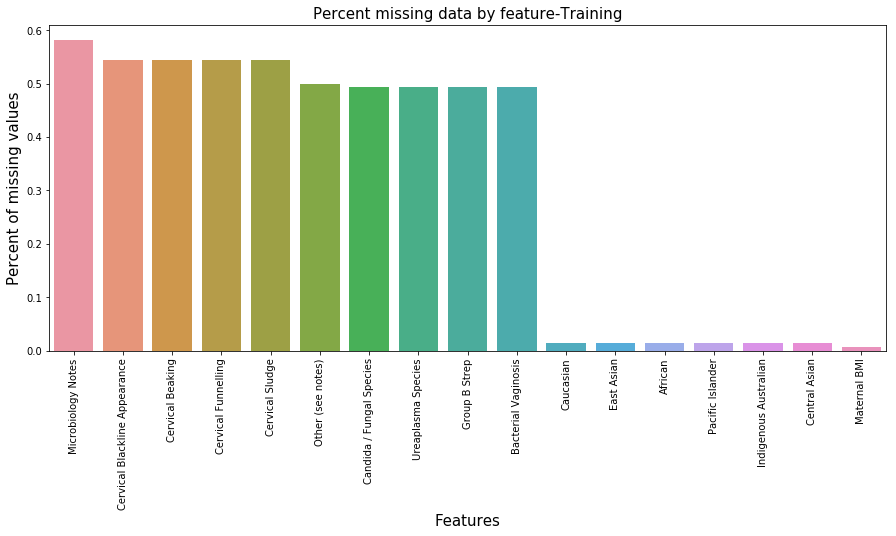

In [18]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_training.index, y=missing_data_training['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature-Training', fontsize=15)
missing_data_training.head()

- __Production__: the top 3 variables with most null values:

,Total,Percent
Cervical Sludge,109,0.726667
Cervical Blackline Appearance,109,0.726667
Cervical Beaking,109,0.726667
Cervical Funnelling,109,0.726667
Microbiology Notes,73,0.486667


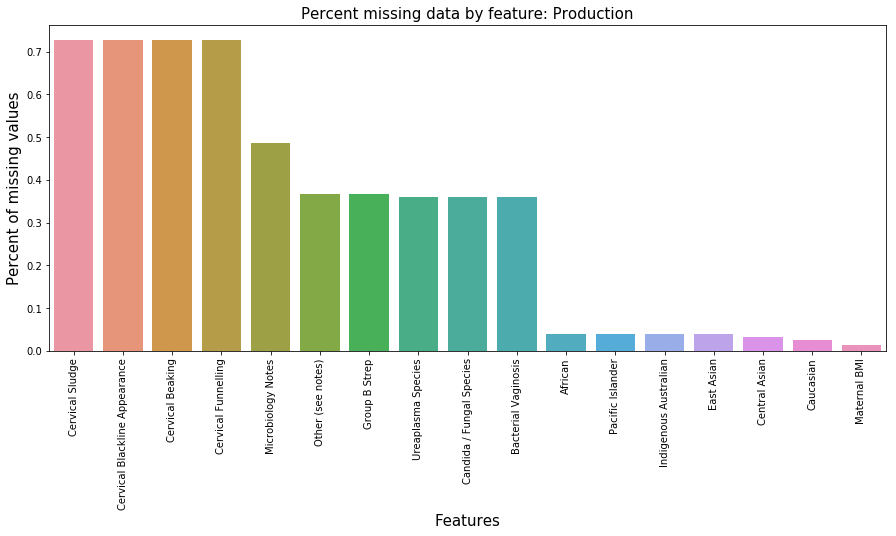

In [19]:
total_null_prod = pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_prod.index, y=missing_data_prod['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature: Production', fontsize=15)
missing_data_prod.head()

#### Note:
- the top 17 features with highest & missing data.

--------------------------------------------
### <font color='red'>Session 1: Exploration Conclusion: </font>
- __Different columns in T & P:__   
  <font color='red'> Gestational Category at Delivery</font> is missed in production, to be predicted.__  
  
- __Difference top variables with null values in T & P:__  
    - Training top 2 features: <font color='red'>'Microbiology Notes', 'Cervical Blackline Appearance', 'Cervical Beaking'</font>;  
    - Production top 2 features: <font color='red'>'Cervical Sludge', 'Cervical Blackline Appearance', 'Cervical Beaking'</font>.  
- __Lots of features have great difference in description information between T & P (>30% difference):__  
    __e.g.:__  
     - Training Parity.std VS Production Parity.std: 0.309125
     - Training B2.mean VS Production B2. mean: 0.3078
-----------------------------------------------

### <font color='red'>2: Data Pre-process:</font>

#### 2.0: Encoding:

- __Training, production dataset:__ Convert string values in columns except for target into numerical.

In [104]:
from sklearn import preprocessing

In [105]:
le = preprocessing.LabelEncoder()

In [121]:
def encoding_df(df):
    for col in df:
        if col!=target and df[col].dtype=='O':
            df[col]=le.fit_transform(df[col])

In [122]:
# Encode training data:
encoding_df(pd_frame_training)

In [123]:
# Encode prod data:
encoding_df(pd_frame_production)

#### 2.1: Fill the null values in T & P data:

In [127]:
list_top_null = list(missing_data_training.index)

for item in list_top_null:
    pd_frame_training[item].fillna(pd_frame_training[item].mode()[0], inplace=True)

#### -  No null in training data after fill in the missing values with the most common value :

In [128]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_training.head()

,Total,Percent
P102,0,0.0
P8,0,0.0
P6,0,0.0
P5,0,0.0
P4,0,0.0


#### Fill the na in prod:

In [129]:
list_top_null = list(missing_data_prod.index)

for item in list_top_null:
    pd_frame_production[item].fillna(pd_frame_production[item].mode()[0], inplace=True)

#### -  No null in production data with >60% missing percent, after fill in the missing values with the most common value.

In [130]:
total_null_prod= pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_prod.head()

,Total,Percent
P102,0,0.0
P9,0,0.0
P7,0,0.0
P6,0,0.0
P5,0,0.0


#### 2.2: Convert to h2oframe:

#### Training data conversion:

In [131]:
frame_training = h2o.H2OFrame(pd_frame_training)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [132]:
print(frame_training['Gestational Category at Delivery'].types)
print(frame_training['Maternal Age at Recruitment / 1st Sample'].types)
print(frame_training['Short Cervix (< 25 mm)'].types)
print(frame_training['Central Asian'].types)

{'Gestational Category at Delivery': 'enum'}
{'Maternal Age at Recruitment / 1st Sample': 'real'}
{'Short Cervix (< 25 mm)': 'int'}
{'Central Asian': 'int'}


In [197]:
frame_training.head(3)

Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
Term,20.86,36.66,3,1,29.6,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,106.457,299.31,1.05487,3.62024,50.9865,12.1944,58.5296,31863.6,112.299,385.4,5427.87,1298.18,6230.89,315.733,1083.57,15260.8,3649.9,17518.5,3.81889,53.7842,12.8635,61.7412,184.583,44.1466,211.891,621.749,2984.22,713.732,21.0658,28.8227,0.0407417,11.5601,0.526458,0.397284,0.659151,0.781434,0.71527,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.08519,1.01903,1.01138,1.14131,1.13366,1.0675,0.746046,1.00791,1.1302,1.06403,1.05638,0.87874,1.00102,0.934858,0.927207,1.26289,1.19673,1.18907,1.31901,1.31136,1.24519,1.04981,1.17209,1.10593,1.09827,1.43396,1.36779,1.36014,1.49008,1.48242,1.41626,1.30478,1.23862,1.23097,1.3609,1.35325,1.28709,1.62277,1.61512,1.54895,1.67124,0.0619736,0.0390199,0.0855525,0.107282,0.0955245,0.0941649,0.0765842,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
Term,23.57,26.26,3,2,31,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1322.59,2453.53,120.71,1.39547,1778.65,69.1083,74.4008,3.245e+06,159650,1845.62,2.35242e+06,91401.7,98401.5,296166,3423.81,4.36397e+06,169559,182544,168.447,214701,8342.07,8980.93,2482.05,96.4383,103.824,122920,132333,5141.71,179.324,205.415,0.0281669,0.572515,5.06654,27.3354,2.39321,23.2689,5.25418,2.88125,27.9866,3.04449,23.9202,5.90546,3.53252,25.3133,46.189,28.1743,25.8014,21.2469,3.23214,0.859202,24.1078,21.7349,3.72017,30.1943,5.25212,26.1278,8.11309,5.74015,27.5209,48.3966,30.3819,28.009,23.4545,5.43977,3.06683,26.3155,23.9425,5.9278,28.1722,49.0479,31.0332,28.6603,24.1058,6.09104,3.71811,26.9667,24.5938,6.57908,46.3746,28.3599,25.9869,49.2356,46.8626,28.8479,24.2934,21.9205,3.90576,24.7814,6.3114,55.4727,0.409699,46.4955,6.72566,1.4871,71.8378,0.530564,60.2122,8.70981,1.92581,4.66328,529.222,76.553,16.9265,3.90861,0.565388,0.125012,64.1643,14.1873,2.05222
Term,20.29,38.99,2,0,24.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,145.187,100.242,0.03125,1.64485,21.5582,0.15625,74.4387,14553.9,4.53709,238.811,3129.96,22.6855,10807.5,3.13257,164.883,2161.04,15.6629,7461.91,0.0514015,0.673692,0.00488281,2.32621,35.4599,0.257008,122.44,3.36846,1604.76,11.6311,12.2552,5.72527,0.00155872,5,0.359147,0.248848,0.461091,0.497616,0.249231,0.916306,0.12331,0.335553,0.372078,0.123693,0.790768,0.225253,0.261779,0.0133933,0.680468,0.474022,0.225636,0.892711,0.262161,0.929236,0.680851,0.365653,0.577896,0.614421,0.366036,1.03311,0.467596,0.504121,0.255736,0.922811,0.716364,0.467979,1.13505,0.504504,1.17158,0.923194,0.342058,0.378583,0.130198,0.797273,0.5

#### Production data conversion:

-------------------------------------------------------
### <font color = 'red'>Session 2 preprocess Conclusion:</font>
- __Fill the null values in T & P data:__  
    No more columns with >50% missing data values.  
- __Convert the text values to integer codes.__
-------------------------------------------------------

### <font color='red'>Session 3: Models training and generate leaderboard.</font>

- Note: As the production dataset has the different columns with training data, this session will just focus on training data. 

#### 3.1: Get independent variables on Training data:

In [134]:
from h2o.automl import H2OAutoML
import time

In [135]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [136]:
#frame_training_drop_SeqNo = h2o.H2OFrame(pd_frame_training_cp)
X=get_independent_variables(frame_training, target) 
print(X)

['Gravidity', 'Parity', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Short Cervix (< 25 mm)', 'History of cervical surgery', 'Cervical Suture', 'Transabdominal suture', 'Uterine Malformation', 'Fertility Assisted Pregnancy', 'Current Smoker', 'Current Illicit Drug User', 'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)', 'Cervical change seen during speculum examination', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes', 'Maternal Pregnancy Induced Hypertension', 'Maternal PET', 'Maternal GDM', 'Antepartum Haemorrhage', 'Polyhydramnios', 'Placenta Previa ', 'Gestational Age at Collection', 'Maternal Age at Recruitment / 1st Sample', 'Maternal BMI', 'B1', 'B2', 'B3', 'B4', '

#### 3.2: Get the best models with parameters:

In [40]:
#Set the run time for auto training limitation.
run_time=500

In [137]:
aml = H2OAutoML(max_runtime_secs=run_time)

In [139]:
model_start_time = time.time()
aml.train(x=X,y=target,training_frame=frame_training)

AutoML progress: |████████████████████████████████████████████████████████| 100%


#### 3.3: Retrive the learderboard of the best models:

- The best models are trained by h2o. Shown as the table below:

In [140]:
leaderboard = aml.leaderboard
print(leaderboard)

model_id,auc,logloss,mean_per_class_error,rmse,mse
DeepLearning_grid_1_AutoML_20190801_170811_model_10,0.881048,0.61949,0.5,0.299923,0.0899541
GBM_1_AutoML_20190801_170811,0.860887,0.310817,0.5,0.296976,0.0881946
DeepLearning_grid_1_AutoML_20190801_170811_model_9,0.81586,1.02741,0.5,0.376913,0.142063
DeepLearning_grid_1_AutoML_20190801_170154_model_3,0.813172,0.72436,0.5,0.351477,0.123536
DeepLearning_grid_1_AutoML_20190801_170811_model_1,0.811828,0.843465,0.458333,0.328991,0.108235
DeepLearning_grid_1_AutoML_20190801_170811_model_5,0.802083,1.14017,0.379032,0.330232,0.109053
GBM_grid_1_AutoML_20190801_170811_model_5,0.797043,0.293044,0.5,0.293408,0.086088
GBM_1_AutoML_20190801_170154,0.783602,0.356842,0.5,0.304776,0.0928881
GBM_grid_1_AutoML_20190801_170154_model_9,0.769489,0.283377,0.5,0.279569,0.0781588
DeepLearning_grid_1_AutoML_20190801_170154_model_5,0.766465,0.682798,0.5,0.308136,0.0949475


#### 3.4: Get the best algorithm of model:
- The <font color='red'>DeepLearning_grid_1_AutoML_20190801_170811_model_10</font> should be the best model to fit training data.

In [192]:
best_model_1 = h2o.get_model(aml.leaderboard[0,'model_id'])
print('The algorithm of best model: ', best_model.algo)

The algorithm of best model:  deeplearning


#### 3.5: Get the parameters of this best deeplearning model:

In [193]:
best_model_1.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_1_AutoML_20190801_170811_model_10',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_1_AutoML_20190801_170811_model_10'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Key_Frame__upload_b3a169833600788ba014474386364760.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Key_Frame__upload_b3a169833600788ba014474386364760.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignmen

- Check the details of this best model:

In [194]:
best_model_1

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190801_170811_model_10


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.001257481412435202
RMSE: 0.03546098436923603
LogLoss: 0.006066318173201001
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.4193548387096774
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6810886616636537: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),12.0,0.0,0.0,(0.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,12.0,124.0,0.0,(0.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6810887,1.0,45.0
max f2,0.6810887,1.0,45.0
max f0point5,0.6810887,1.0,45.0
max accuracy,0.6810887,1.0,45.0
max precision,1.0000000,1.0,0.0
max recall,0.6810887,1.0,45.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.6810887,1.0,45.0
max min_per_class_accuracy,0.6810887,1.0,45.0
max mean_per_class_accuracy,0.6810887,1.0,45.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 90.70 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0147059,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0161290,9.6774194,9.6774194
,2,0.0220588,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0241935,9.6774194,9.6774194
,3,0.0367647,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0403226,9.6774194,9.6774194
,4,0.0441176,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0483871,9.6774194,9.6774194
,5,0.0514706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0564516,9.6774194,9.6774194
,6,0.1029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1129032,9.6774194,9.6774194
,7,0.1544118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1693548,9.6774194,9.6774194
,8,0.2058824,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.2258065,9.6774194,9.6774194
,9,0.3014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.3306452,9.6774194,9.6774194
,10,0.4044118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.0899541007945943
RMSE: 0.2999234915684237
LogLoss: 0.6194897613115667
Mean Per-Class Error: 0.16397849462365588
AUC: 0.8810483870967741
pr_auc: 0.4957336088340611
Gini: 0.7620967741935483
Confusion Matrix (Act/Pred) for max f1 @ threshold = 7.927826562023182e-05: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),0.0,12.0,1.0,(12.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,0.0,136.0,0.0882,(12.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0000793,0.9538462,65.0
max f2,0.0000793,0.9810127,65.0
max f0point5,0.9998315,0.9489051,35.0
max accuracy,0.7797558,0.9117647,59.0
max precision,1.0000000,1.0,0.0
max recall,0.0000793,1.0,65.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9998315,0.4597111,35.0
max min_per_class_accuracy,0.9998315,0.8333333,35.0
max mean_per_class_accuracy,0.9998315,0.8360215,35.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 96.52 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0147059,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0161290,9.6774194,9.6774194
,2,0.0220588,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0241935,9.6774194,9.6774194
,3,0.0367647,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.0403226,9.6774194,9.6774194
,4,0.0441176,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0483871,9.6774194,9.6774194
,5,0.0514706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0080645,0.0564516,9.6774194,9.6774194
,6,0.1029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1129032,9.6774194,9.6774194
,7,0.1544118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1693548,9.6774194,9.6774194
,8,0.2058824,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.2258065,9.6774194,9.6774194
,9,0.3014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.3306452,9.6774194,9.6774194
,10,0.4044118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.926455,0.0234362,0.9285714,0.962963,0.8888889,0.8888889,0.962963
auc,0.8872382,0.0338244,0.8653846,0.9230769,0.9021739,0.8055556,0.94
err,0.0735450,0.0234362,0.0714286,0.0370370,0.1111111,0.1111111,0.0370370
err_count,2.0,0.6324555,2.0,1.0,3.0,3.0,1.0
f0point5,0.9391546,0.0197354,0.942029,0.9701493,0.9055118,0.9090909,0.9689922
f1,0.9608878,0.0129308,0.962963,0.9811321,0.9387755,0.9411765,0.9803922
f2,0.9838929,0.0054303,0.9848485,0.9923664,0.9745763,0.9756098,0.9920635
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,0.6194679,0.2138823,0.6224415,0.1571698,0.8269042,1.0360788,0.4547451
max_per_class_error,0.85,0.1414214,1.0,1.0,0.75,1.0,0.5


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-01 17:13:36,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-08-01 17:13:37,1 min 18.274 sec,353 obs/sec,2.4191176,1,329.0,0.2176115,0.1716197,0.4113754,0.9711022,0.9004491,1.0967742,0.0514706
,2019-08-01 17:13:42,1 min 24.051 sec,353 obs/sec,16.7352941,7,2276.0,0.0354610,0.0060663,0.9843694,1.0,0.4193548,1.0967742,0.0


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
P18,1.0,1.0,0.0072751
History of cervical surgery,0.9991920,0.9991920,0.0072692
P37,0.9911575,0.9911575,0.0072108
B2,0.9883270,0.9883270,0.0071902
P25,0.9880441,0.9880441,0.0071881
---,---,---,---
P70,0.8964775,0.8964775,0.0065220
P2,0.8915374,0.8915374,0.0064860
P74,0.8866323,0.8866323,0.0064503
P65,0.8757074,0.8757074,0.0063709



See the whole table with table.as_data_frame()


### <font color='red'>Session 3 Model Training Conclusions:</font>  
- The best model is:   
   <font color='red'>1. DeepLearning_grid_1_AutoML_20190801_170811_model_10</font>: AUC 1.0, Cross-Validation AUC: 0.8810  
   <font color='red'>2. GBM_1_AutoML_20190801_170811</font> : AUC 1.0, Cross-Validation AUC: 0.860887  
   <font color='red'>3. DeepLearning_grid_1_AutoML_20190801_170811_model_9</font>: AUC 1.0, Cross-Validation AUC: 0.81586

----------------------------------------------------------

### <font color='red'>Session 4: Interpretability </font>

#### 4.1: Retrive the variable importance of training dataset based on the best model.

- The top important variables filter by the threshold of 'relative importance' 0.7 (importance >0.7).

In [187]:
matrix_VI=best_model.varimp(True)
matrix_VI.iloc[0:10]
#matrix_VI[matrix_VI['relative_importance']>0.70]

,variable,relative_importance,scaled_importance,percentage
0,P18,1.000000,1.000000,0.007275
1,History of cervical surgery,0.999192,0.999192,0.007269
2,P37,0.991157,0.991157,0.007211
3,B2,0.988327,0.988327,0.007190
4,P25,0.988044,0.988044,0.007188
5,P96,0.987601,0.987601,0.007185
6,P87,0.983565,0.983565,0.007156
7,P102,0.982501,0.982501,0.007148
8,P48,0.981766,0.981766,0.007142
9,P49,0.981019,0.981019,0.007137


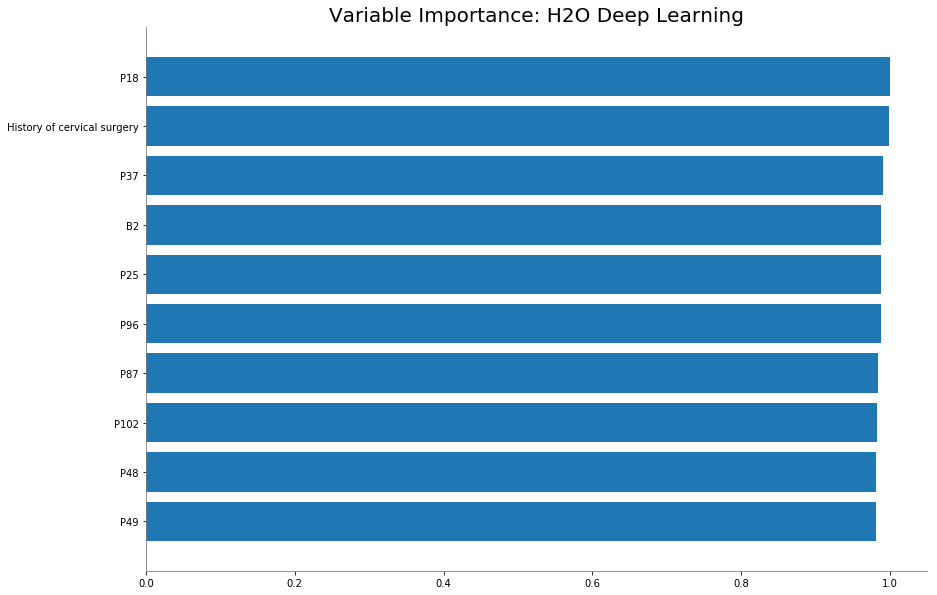

In [145]:
best_model.varimp_plot(10)

#### 4.2 Retrive the most important variables based on the 2nd best model:

In [146]:
best_model_2 = h2o.get_model(aml.leaderboard[1,'model_id'])
print('The algorithm of best model: ', best_model_2.algo)

The algorithm of best model:  gbm


- The AUC of model_2:

In [189]:
best_model_2.auc()

1.0

In [186]:
matrix_VI_2=best_model_2.varimp(True)
matrix_VI_2.iloc[0:10]

,variable,relative_importance,scaled_importance,percentage
0,Cervical Beaking,5.059201,1.000000,0.095568
1,Ureaplasma Species,4.155577,0.821390,0.078498
2,P8,3.839522,0.758919,0.072528
3,P25,3.378269,0.667748,0.063815
4,Gestational Age at Collection,2.491311,0.492432,0.047060
5,Maternal BMI,2.469193,0.488060,0.046643
6,Transabdominal suture,2.337824,0.462093,0.044161
7,P59,1.892785,0.374127,0.035754
8,P40,1.703702,0.336753,0.032183
9,P43,1.603786,0.317004,0.030295


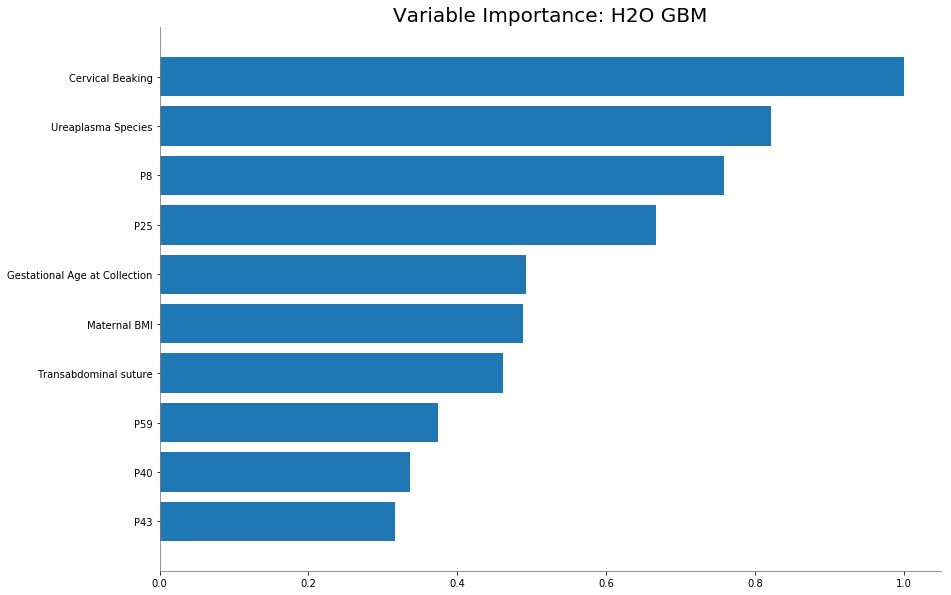

In [148]:
best_model_2.varimp_plot(10)

#### 4.3 Retrive the important variables based on 3rd best model:

In [149]:
best_model_3 = h2o.get_model(aml.leaderboard[2,'model_id'])
print('The algorithm of best model: ', best_model_3.algo)

The algorithm of best model:  deeplearning


- AUC of model_3:

In [190]:
best_model_3.auc()

1.0

- The top 10 most important variables based on model3：

In [188]:
matrix_VI_3=best_model_3.varimp(True)
matrix_VI_3.iloc[0:10]
#matrix_VI_3[matrix_VI['relative_importance']>1.0]

,variable,relative_importance,scaled_importance,percentage
0,Maternal BMI,1.000000,1.000000,0.009394
1,Cervical Beaking,0.948009,0.948009,0.008905
2,Microbiology Culture,0.929353,0.929353,0.008730
3,Ureaplasma Species,0.890729,0.890729,0.008367
4,Uterine Malformation,0.868195,0.868195,0.008156
5,Transabdominal suture,0.854918,0.854918,0.008031
6,P13,0.842136,0.842136,0.007911
7,Cervical Sludge,0.820622,0.820622,0.007709
8,Antepartum Haemorrhage,0.817178,0.817178,0.007676
9,"Multiple Pregnancy (twins, triplets)",0.816365,0.816365,0.007669


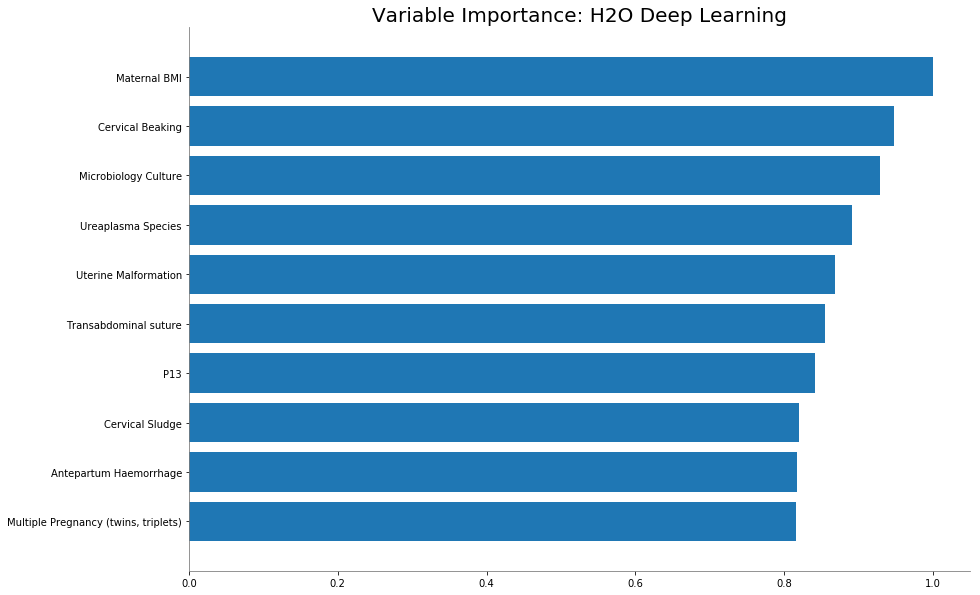

In [151]:
best_model_3.varimp_plot(10)

### <font color='red'> Session 4 Variable importance Conclusion: </font>  
- The most 3 important variables in:
    - Top 1 model- __DeepLearning_1__:  
        - <font color='red'>P18;   </font>  
        - <font color='red'>History of cervical surgery;  </font>  
        - <font color='red'>P37;   </font>
        
    - Top 2 model - __GBM_1__:
        - <font color='red'>Cervical Beaking;   </font>  
        - <font color='red'>Ureaplasma Species;  </font>  
        - <font color='red'>P8;   </font>  
    - Top 3 model -__DeepLearning_2__:
        - <font color='red'>Maternal BMI;   </font>  
        - <font color='red'>Cervical Beaking;  </font>  
        - <font color='red'>Microbiology Culture;   </font>
------------------------------------------

### <font color='red'>**(Optional) Session 5 'Partial dependence plot' on some top important features. </font>

#### The PDP plot shows:
    - whether the relationship between the target and a feature(cervical_beaking here) is linear, monotonic or more complex.
    - how this feature(cervical_beaking here) influences the prediction on average.  

#### 5.1: Retrive the PDP of top 1 important variable.

In [152]:
variable_top1 = [(matrix_VI.iloc[:,0])[0]]
print('The most important variable: ', variable_top1)

The most important variable:  ['P18']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


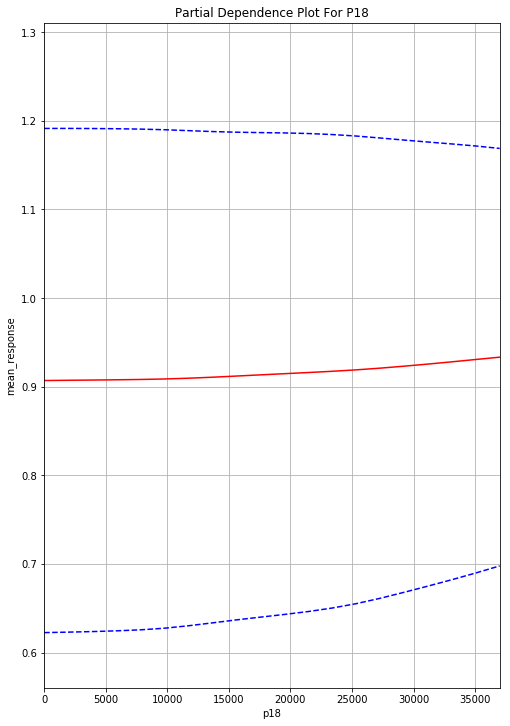

In [154]:
pdp_helpfulness = best_model.partial_plot(frame_training, cols = variable_top1)

- #### This plot shows:
  <font color='red'> The most imporatant variable will influence the target linearly, and positive correlation.</font>

#### 5.2: Retrive the PDP: the most important variable in 2nd best model.

In [155]:
variable_top2 = [(matrix_VI_2.iloc[:,0])[0]]
print('The most important variable: ', variable_top2)

The most important variable:  ['Cervical Beaking']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


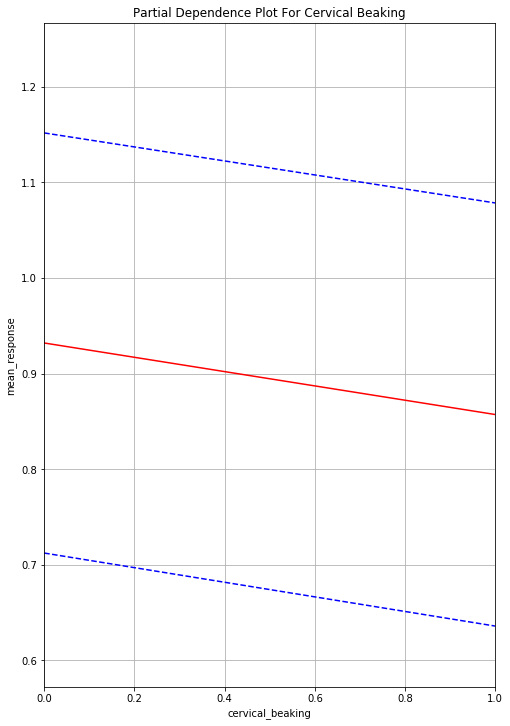

In [157]:
pdp_helpfulness_2 = best_model_2.partial_plot(frame_training, cols = variable_top2)

#### 5.3: Retrive the PDP: the most important variable in 3rd best model.

In [158]:
variable_top3 = [(matrix_VI_3.iloc[:,0])[0]]
print('The most important variable: ', variable_top3)

The most important variable:  ['Maternal BMI']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


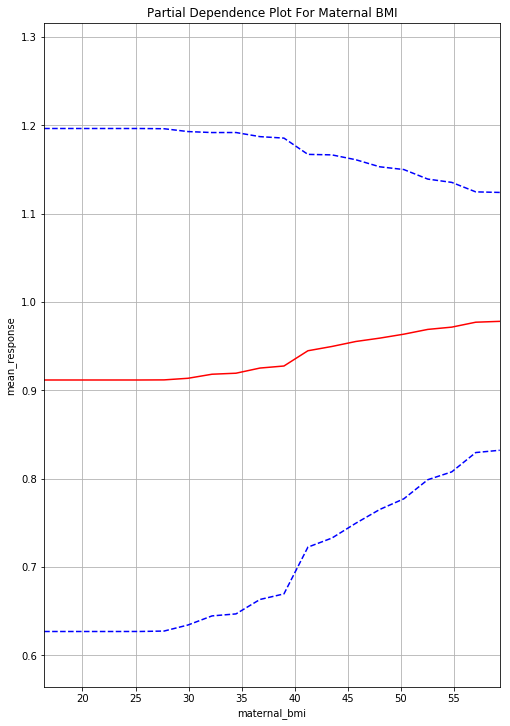

In [160]:
pdp_helpfulness_3 = best_model_3.partial_plot(frame_training, cols = variable_top3)

### <font color='red'>Session 5: Partial dependence plot Conclusion:</font>
   - For 1st best model-__Deeplearning_1__ :   
       The most important variable <font color='red'>__'P18'__</font> is <font color='red'>linear and positive correlation to the target</font>.
   - For 2nd best model-__GBM_1__:  
       The most important variable <font color='red'>__'Cervical Beaking'__</font> is <font color='red'> is negatively correlated to target.</font>.
   - For 3rd best model-__GBM_grid_1_AutoML_20190731_193406_model_11__:  
       The most important variable <font color='red'>__'Maternal BMI'__</font> is <font color='red'>positive correlation to the target with increasing trend</font>.
------------------------------------------

### <font color='red'> Session 6: Predict Term on Production data:</font>
- Based on the picked best model & parameters: __'DeepLearning_grid_1_AutoML_20190801_170811_model_10'__

- Predict the term/pre-term based on __production data__; (Even though current(Jul.26 2019) production data missed 'Gestational Category at Delivery' column.)

In [213]:
best_model_1.model_id

'DeepLearning_grid_1_AutoML_20190801_170811_model_10'

#### 6.0: Convert to h2o frame: 

In [163]:
frame_production_preprocessed = h2o.H2OFrame(pd_frame_production)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [165]:
frame_production_preprocessed.head(3)

Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage? (? 50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
19.71,40.19,6,1,19.5,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,298.19,261.747,0.450185,2.32042,47.7542,5.05162,146.812,78050.2,134.241,691.925,14239.8,1506.34,43778,117.834,607.361,12499.5,1322.24,38427.7,1.04462,21.4982,2.27416,66.0928,110.81,11.7219,340.666,241.236,7010.91,741.641,29.9008,19.5931,0.0192997,11.2212,0.802725,0.591445,0.806324,1.0632,0.720426,1.82696,0.398706,0.613585,0.870457,0.527687,1.63422,0.402305,0.659177,0.316408,1.42294,0.874056,0.531286,1.63782,0.788159,1.89469,1.55192,0.896438,1.11132,1.36819,1.02542,2.13195,0.900037,1.15691,0.814139,1.92067,1.37179,1.02902,2.13555,1.28589,2.39243,2.04966,0.707298,0.96417,0.621401,1.72794,1.17905,0.836279,1.94281,1.09315,2.19969,1.85692,0.967769,0.624999,1.73153,0.881872,1.98841,1.64564,1.09675,2.20329,1.86052,2.11739,0.151805,0.046644,0.153596,0.28145,0.110842,0.6616,0.0285819,0.0941184,0.172463,0.0679202,0.405406,0.0289191,0.0529914,0.0208694,0.124566,0.174498,0.0687217,0.41019,0.125926,0.751632,0.296012
18.71,21.55,2,0,25.9,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,400.607,136.302,0.157675,0.21961,57.4394,8.16566,28.2188,54603.6,63.1657,87.9773,23010.6,3271.22,11304.6,21.4915,29.9333,7829.12,1113,3846.28,0.034627,9.05676,1.28752,4.44939,12.6143,1.79326,6.19712,469.031,1620.87,230.425,41.5496,15.738,0.0599085,51.7879,0.827506,0.701506,0.69789,1.34883,1.02866,0.924174,0.191645,0.188028,0.838971,0.518795,0.414313,0.0620285,0.712972,0.392795,0.288313,0.709355,0.389179,0.284696,1.04012,0.935639,0.615463,0.860329,0.856712,1.50766,1.18748,1.083,0.730712,1.38166,1.06148,0.956997,1.37804,1.05786,0.95338,1.70881,1.60432,1.28415,0.220851,0.871794,0.551618,0.447136,0.868177,0.548001,0.443519,1.19894,1.09446,0.774286,0.742177,0.422001,0.317519,1.07294,0.968462,0.648286,1.06933,0.964845,0.644669,1.29561,0.106202,0.0219479,0.0195295,0.454805,0.240708,0.170842,0.00521296,0.00463856,0.108023,0.0571718,0.0405776,0.000958613,0.0223242,0.0118152,0.00838585,0.0198644,0.0105133,0.00746183,0.244835,0.173772,0.0919697
17.71,31.74,2,0,22.3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,372.616,897.391,6.27907,1.65981,102.23,38.1179,79.7012,334382,2339.68,618.472,38092.4,14203.3,29697.9,5634.78,1489.5,91739.8,34206.7,71523.1,10.4221,641.906,239.345,500.449,169.682,63.2685,132.289,3896.77,8147.82,3038.04,69.1692,87.973,0.0424764,6.07063,1.66762,1.92905,0.8427,1.83248,2.30234,1.34357,2.35275,1.2664,2.25618,2.72604,1.76727,1.52783,2.5176,2.98747,2.0287,1.43125,1.90112,0.942347,2.8909,1.93212,2.40199,2.97471,1.88836,2.87814,3.348,2.38923,2.14979,3.13957,3.60943,2.65066,2.05322,2.52308,1.56431,3.51286,2.55409,3.02395,2.57349,3.56326,4.03313,3.07436,2.47691,2.94678,1

#### 6.1: Prediction on the production data:

- Predict on production data with top 1 model trained.

In [166]:
pred_prod = aml.leader.predict(frame_production_preprocessed)

deeplearning prediction progress: |███████████████████████████████████████| 100%


c:\python37\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)': substituting in a column of NaN
  warnings.warn(w)


In [167]:
print(pred_prod)

predict,Preterm (?20 weeks < 37 weeks),Term
Term,6.6657e-07,0.999999
Term,1.27884e-05,0.999987
Term,4.35797e-09,1
Term,1.3139e-07,1
Term,7.47049e-10,1
Term,0.243998,0.756002
Term,0.0535059,0.946494
Term,1.391e-07,1
Term,2.43223e-06,0.999998
Term,5.37839e-11,1


#### 6.2: Concat the prediction result with Production data.

- Concat the predicted result and seq no.

In [168]:
#pd_pred_prod = pred_prod.as_data_frame().predict

pd_pred_prod = pred_prod.as_data_frame()
# Convert prediction h2oframe to pandaframe, and get the prediction result of every observation.

seqNo_df = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.

In [169]:
#res_seqno_prediction = pd.concat([seqNo_df,pred_res],axis=1,ignore_index = True)
res_seqno_prediction = pd.concat([seqNo_df,pd_pred_prod],axis=1,ignore_index = True)

In [170]:
res_seqno_prediction

,0,1,2,3
0,1,Term,6.665700e-07,0.999999
1,3,Term,1.278839e-05,0.999987
2,6,Term,4.357966e-09,1.000000
3,7,Term,1.313897e-07,1.000000
4,8,Term,7.470490e-10,1.000000
5,9,Term,2.439982e-01,0.756002
6,12,Term,5.350591e-02,0.946494
7,13,Term,1.391004e-07,1.000000
8,14,Term,2.432225e-06,0.999998
9,16,Term,5.378392e-11,1.000000


#### Output to model_1 csv:

In [218]:
res_seqno_prediction.to_csv('output/model1_'+best_model_1.model_id+'_prediction.csv')

#### 6.3.1 Get the predicted result based on 2nd best model:

In [171]:
pred_prod_2 = best_model_2.predict(frame_production_preprocessed)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [172]:
pd_pred_prod_2 = pred_prod_2.as_data_frame()
seqNo_df_2 = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.
res_seqno_prediction_2 = pd.concat([seqNo_df_2,pd_pred_prod_2],axis=1,ignore_index = True)

In [173]:
res_seqno_prediction_2

,0,1,2,3
0,1,Term,0.010344,0.989656
1,3,Term,0.029509,0.970491
2,6,Term,0.003926,0.996074
3,7,Term,0.003926,0.996074
4,8,Preterm (?20 weeks < 37 weeks),0.039357,0.960643
5,9,Term,0.004810,0.995190
6,12,Preterm (?20 weeks < 37 weeks),0.050138,0.949862
7,13,Term,0.014234,0.985766
8,14,Term,0.003760,0.996240
9,16,Term,0.003760,0.996240


#### Output prediction based on model 2 to .csv:

In [219]:
res_seqno_prediction_2.to_csv('output/model2_'+best_model_2.model_id+'_prediction.csv')

#### 6.3.2 Get the predicted result based on 3rd best model:

In [174]:
pred_prod_3 = best_model_3.predict(frame_production_preprocessed)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [175]:
pd_pred_prod_3 = pred_prod_3.as_data_frame()
seqNo_df_3 = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.
res_seqno_prediction_3 = pd.concat([seqNo_df_3,pd_pred_prod_3],axis=1,ignore_index = True)

In [176]:
res_seqno_prediction_3

,0,1,2,3
0,1,Term,4.715137e-20,1.000000e+00
1,3,Term,4.093218e-19,1.000000e+00
2,6,Term,1.553648e-23,1.000000e+00
3,7,Term,6.512664e-20,1.000000e+00
4,8,Term,1.498719e-24,1.000000e+00
5,9,Preterm (?20 weeks < 37 weeks),9.999978e-01,2.203699e-06
6,12,Term,3.413163e-18,1.000000e+00
7,13,Term,8.218780e-28,1.000000e+00
8,14,Term,4.134074e-22,1.000000e+00
9,16,Term,1.405248e-26,1.000000e+00


#### Output prediciton based on model3 to .csv:

In [220]:
res_seqno_prediction_3.to_csv('output/model3_'+best_model_3.model_id+'_prediction.csv')

### <font color='red'>Summary:</font>
- __Best models:__  
    - DeepLearning_grid_1_AutoML_20190801_170811_model_10  
    - GBM_1_AutoML_20190801_170811  
    - DeepLearning_grid_1_AutoML_20190801_170811_model_9 
    
- __Performance comparison:__  
<img src="Image/matrix.png">

In [118]:
#h2o.remove_all()

In [119]:
#h2o.shutdown()